<a href="https://colab.research.google.com/github/Bahcee1/EDA-of-Socioeconomic-indicators-in-Chicago-using-SQLite-database/blob/main/Chicago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Selected Socioeconomic Indicators in Chicago**

This analysis tends to study the socioeconomic indicators in chicago and how lifestyle, condition, and income affects the people of chicago using a Hardship index. The city of Chicago released a dataset of socioeconomic data to the [Chicago City Portal](https://https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2/about_data?utm_content=000026UJ&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01&utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_term=10006555). This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

# **Summary of the dataset**:


**Community Area Number** (ca): Used to uniquely identify each row of the dataset

**Community Area Name** (community_area_name): The name of the region in the city of Chicago.

**Percent of Housing Crowded** (percent_of_housing_crowded): Percent of occupied housing units with more than one person per room

**Percent Households Below Poverty** (percent_households_below_poverty): Percent of households living below the federal poverty line

**Percent Aged 16+ Unemployed** (percent_aged_16_unemployed): Percent of persons over the age of 16 years that are unemployed

**Percent Aged 25+ without High School Diploma** (percent_aged_25_without_high_school_diploma): Percent of persons over the age of 25 years without a high school education

**Percent Aged Under 18 or Over 64**:Percent of population under 18 or over 64 years of age (percent_aged_under_18_or_over_64): (ie. dependents)

**Per Capita Income** (per_capita_income_): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

**Hardship Index** (hardship_index): Score that incorporates each of the six selected socioeconomic indicators



In [1]:
'''The syntax for connecting to magic sql using sqllite is
%sql sqlite://DatabaseName

where DatabaseName will be your .db file'''
!pip install ipython-sql
!pip install seaborn
import seaborn as sns
%load_ext sql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.5 MB/s eta 0:00:00


In [2]:
import csv, sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()

In [3]:
%sql sqlite:///socioeconomic.db

In [4]:
import pandas as pd
chicago=pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
chicago.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")

78

In [5]:
! pip install ipython-sql prettytable
import prettytable
prettytable.DEFAULT = 'DEFAULT'
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [6]:
%%sql

-- number of rows in the dataset --
SELECT COUNT(*) FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
78


In [9]:
%%sql

-- How many community areas in Chicago have a hardship index greater than 50.0?--
select community_area_name, hardship_index from chicago_socioeconomic_data where hardship_index > 50.0;

select count (*) from chicago_socioeconomic_data where hardship_index > 50.0;

 * sqlite:///socioeconomic.db
Done.
Done.


count (*)
38


In [10]:
%%sql

--What is the maximum value of hardship index in this dataset?--
select Max(hardship_index) as max_hardship_index from chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


max_hardship_index
98.0


In [14]:
%%sql
-- Which community area which has the highest hardship index?--
select community_area_name, hardship_index from chicago_socioeconomic_data where hardship_index = (select max(hardship_index) from chicago_socioeconomic_data);

-- Alternative --
select community_area_name, hardship_index from chicago_socioeconomic_data order by hardship_index desc limit 1;

 * sqlite:///socioeconomic.db
Done.
Done.


community_area_name,hardship_index
Riverdale,98.0


In [15]:
%%sql
--Which Chicago community areas have per-capita incomes greater than $60,000?--
select community_area_name, per_capita_income_ from chicago_socioeconomic_data where per_capita_income_ > 60000;

 * sqlite:///socioeconomic.db
Done.


community_area_name,per_capita_income_
Lake View,60058
Lincoln Park,71551
Near North Side,88669
Loop,65526


 * sqlite:///socioeconomic.db
Done.


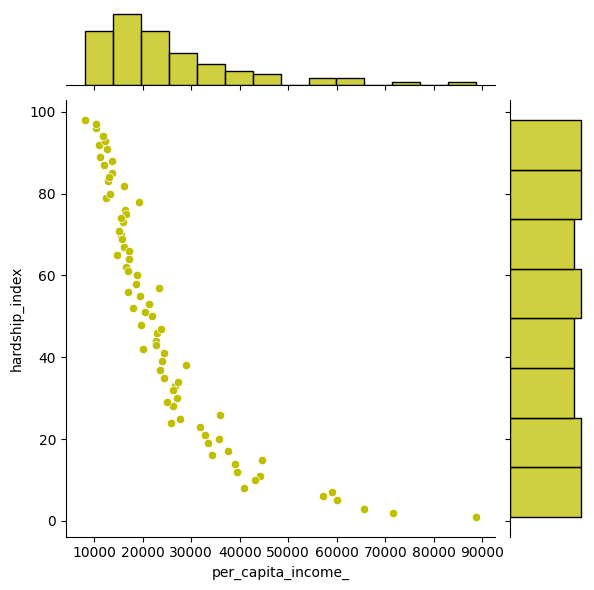

In [18]:
#--Create a scatter plot using the variables per_capita_income_ and hardship_index. Explain the correlation between the two variables.--
income_vs_hardship = %sql select per_capita_income_, hardship_index from chicago_socioeconomic_data;
income_vs_hardship_df = income_vs_hardship.DataFrame()
sns.jointplot(x='per_capita_income_', y='hardship_index', data=income_vs_hardship_df, kind="scatter", color="y");

The above plot shows that as the per_capita_income increases, the hardship_index reduces. So in other to reduce the hardship faced by the people of chicago, the government needs to either increase the gross salary of every individual or by emploring the people to take up more jobs. Also, we can look at the potential reasons that might deter people from taking up more jobs like distance to workplace, work culture, work environment, availability of both skilled and unskilled jobs. After identifying these potential factors, the government can try to come in by creating more jobs and encouraging the people to take up even remote jobs available to them.

 * sqlite:///socioeconomic.db
Done.


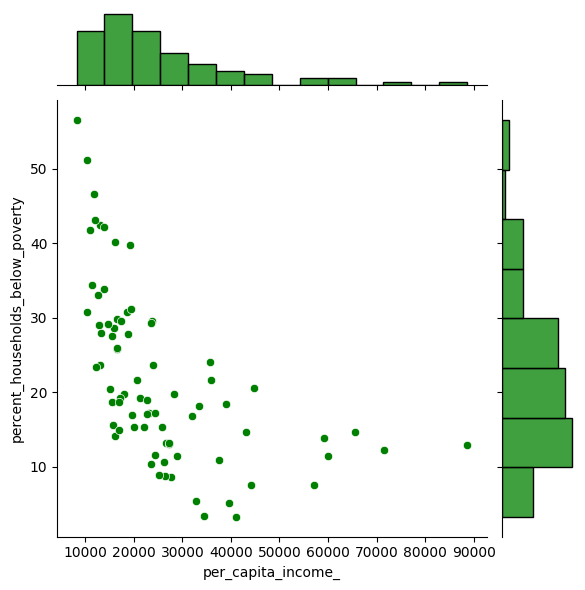

In [19]:
#how the variable per_capita_income_ is related to percent_households_below_poverty and percent_aged_16_unemployed

income_vs_household= %sql select per_capita_income_, percent_households_below_poverty from chicago_socioeconomic_data;
income_vs_household = income_vs_household.DataFrame()
sns.jointplot(x='per_capita_income_',y='percent_households_below_poverty',data=income_vs_household,kind= "scatter", color = 'g', )

Consequently, we can see from the plot above that the percentage of people living below the government poverty line greatly reduces with an increase in income per capital